# 6.1.4 Generate Random Latitudes and Longitudes

## Create Latitude and Longitude Combinations

In [1]:
# Import dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from citipy import citipy

In [3]:
# Recreating the above cells, but using a loop to ensure sufficient cities

# Create list for holding cities
cities = []
min_cities = 500

while (len(cities) < min_cities):

    # Create a set of random latitude and longitude combinations
    list_length = min_cities*3

    lats = np.random.uniform(-90,90,size=list_length)
    lngs = np.random.uniform(-180,180,size=list_length)

    lat_lngs = zip(lats,lngs)

    coordinates = list(lat_lngs)

    # Identify nearest city for each latitude-longitude combination
    for coord in coordinates:
        city = citipy.nearest_city(coord[0], coord[1]).city_name

        # If city is unique, add it to cities list
        if city not in cities:
            cities.append(city)

len(cities)

595

# 6.2.6 Get the City Weather Data

## Import Dependencies, and Initialize an Empty List and Counters

In [4]:
# Import requests library
import requests

# Import API key
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call
url = 'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + weather_api_key

In [6]:
# Import time library and datetime module from datetime library 
import time
from datetime import datetime

## Loop Through the List of Cities and Build the City URL

### The next cell takes a minimum of ten minutes to run. Cells that follow (up until the relevant note below) are disabled to avoid this lengthy delay on subsequent runs.
# ▼Disable▼

# 6.2.7 Create a DataFrame of City Weather Data

# ▲Disable▲

### The next cell recreates a DataFrame from a previous run of the above disabled cells.

In [7]:
city_data_path = os.path.join('.','weather_data','cities.csv')

df_city_data = pd.read_csv(city_data_path)
df_city_data = df_city_data.set_index('City_ID')
df_city_data.index.name = None

df_city_data.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Beroroha,MG,2022-05-08 22:00:47,-21.6667,45.1667,68.68,79,0,1.86
1,Rikitea,PF,2022-05-08 22:00:47,-23.1203,-134.9692,76.37,77,78,19.69
2,Albany,US,2022-05-08 22:00:11,42.6001,-73.9662,63.88,29,100,1.01
3,Saint George,US,2022-05-08 21:57:19,37.1041,-113.5841,84.63,10,0,36.82
4,Atikokan,CA,2022-05-08 22:00:49,48.7555,-91.6216,48.70,93,100,13.33


# 6.3.1 Plot Latitude vs. Temperature

## Get Data for Plotting

In [8]:
# Extract relevant fields from the DataFrame for plotting
lats = df_city_data['Lat']
max_temps = df_city_data['Max Temp']
humidity = df_city_data['Humidity']
cloudiness = df_city_data['Cloudiness']
wind_speed = df_city_data['Wind Speed']

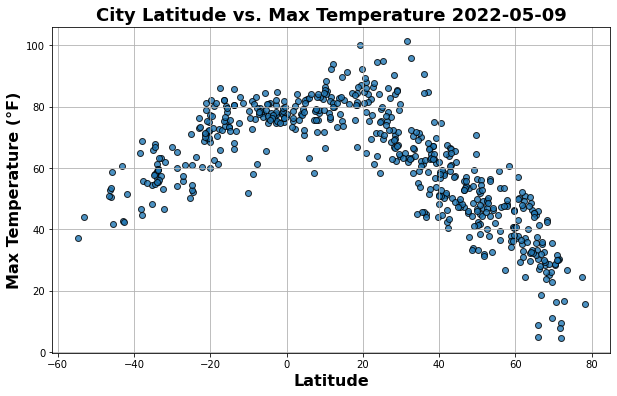

In [28]:
%matplotlib inline

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(
    lats,
    max_temps,
    label='Cities',
    marker='o',
    alpha=0.8,
    edgecolor='black',
    linewidths=1
)

# Incorporate the other graph properties.
# ax.set_title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
ax.set_title(
    f'City Latitude vs. Max Temperature '+ time.strftime('%Y-%m-%d'),
    fontsize=18,
    fontweight='bold'
)
ax.set_ylabel(
    'Max Temperature (°F)',
    fontsize=16,
    fontweight='bold'
)
ax.set_xlabel(
    'Latitude',
    fontsize=16,
    fontweight='bold'
)
ax.grid()

# Save the figure.
plt.savefig(os.path.join('.','weather_data','fig1.png'))

# 6.3.2 Plot Latitude vs. Humidity

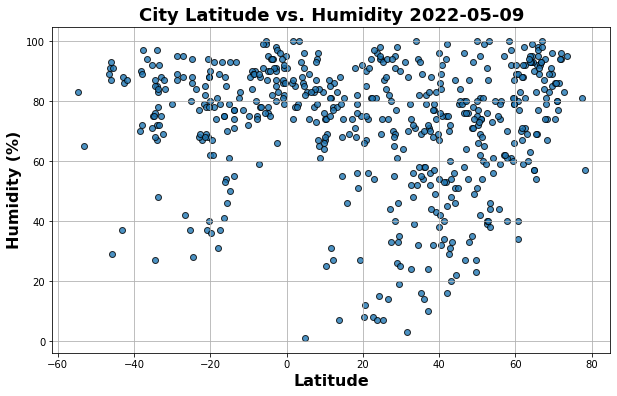

In [29]:
# Build the scatter plot for latitude vs. humidity
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(
    lats,
    humidity,
    label='Cities',
    marker='o',
    alpha=0.8,
    edgecolor='black',
    linewidths=1
)

# Incorporate the other graph properties.
ax.set_title(
    f'City Latitude vs. Humidity '+ time.strftime('%Y-%m-%d'),
    fontsize=18,
    fontweight='bold'
)
ax.set_ylabel(
    'Humidity (%)',
    fontsize=16,
    fontweight='bold'
)
ax.set_xlabel(
    'Latitude',
    fontsize=16,
    fontweight='bold'
)
ax.grid()

# Save the figure.
plt.savefig(os.path.join('.','weather_data','fig2.png'))

# 6.3.3 Plot Latitude vs. Cloudiness

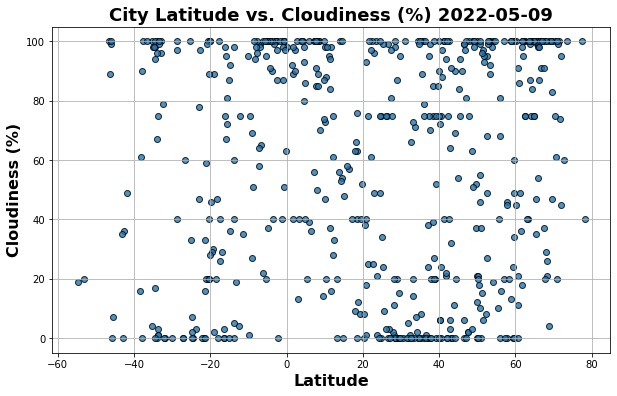

In [30]:
# Build the scatter plot for latitude vs. cloudiness
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(
    lats,
    cloudiness,
    label='Cities',
    marker='o',
    alpha=0.8,
    edgecolor='black',
    linewidths=1
)

# Incorporate the other graph properties.
ax.set_title(
    f'City Latitude vs. Cloudiness (%) '+ time.strftime('%Y-%m-%d'),
    fontsize=18,
    fontweight='bold'
)
ax.set_ylabel(
    'Cloudiness (%)',
    fontsize=16,
    fontweight='bold'
)
ax.set_xlabel(
    'Latitude',
    fontsize=16,
    fontweight='bold'
)
ax.grid()

# Save the figure.
plt.savefig(os.path.join('.','weather_data','fig3.png'))

# 6.3.4 Plot Latitude vs. Wind Speed

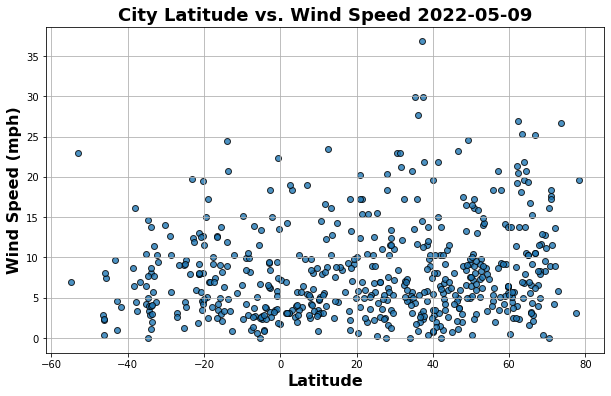

In [31]:
# Build the scatter plot for latitude vs. wind speed
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(
    lats,
    wind_speed,
    label='Cities',
    marker='o',
    alpha=0.8,
    edgecolor='black',
    linewidths=1
)

# Incorporate the other graph properties.
ax.set_title(
    f'City Latitude vs. Wind Speed '+ time.strftime('%Y-%m-%d'),
    fontsize=18,
    fontweight='bold'
)
ax.set_ylabel(
    'Wind Speed (mph)',
    fontsize=16,
    fontweight='bold'
)
ax.set_xlabel(
    'Latitude',
    fontsize=16,
    fontweight='bold'
)
ax.grid()

# Save the figure.
plt.savefig(os.path.join('.','weather_data','fig4.png'))